In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CreatorsLab/kidney_disease/kidney.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.drop(columns=['id'],inplace=True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = list(df.columns)
le = LabelEncoder()
for col in cols:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,26,56,49,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,49,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0


In [ ]:
df['class'].value_counts()

0    248
2    150
1      2
Name: class, dtype: int64

In [ ]:
# Logistic Regression Model
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['class'])
y = df['class']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Logreg = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
logreg_model = Logreg.fit(X_train,y_train)
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)
print(f'Train Accuracy: {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test,y_test_pred)}')

Train Accuracy: 0.99375
Test Accuracy: 0.975


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
for i in cv_scores:
  print(i)
average_cv_score = cv_scores.mean()
print(f"Average cross-validation score: {average_cv_score:.2f}")

0.975
0.9625
0.975
0.9625
0.9625
Average cross-validation score: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


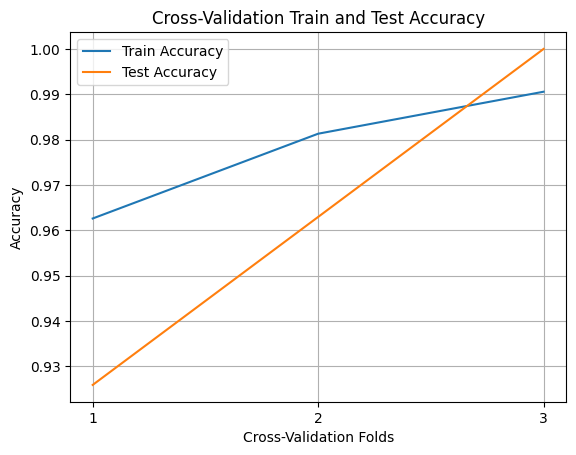

In [ ]:
train_scores = cross_val_score(logreg_model, X_train, y_train, cv=3, scoring='accuracy')
test_scores = cross_val_score(logreg_model, X_test, y_test, cv=3, scoring='accuracy')

x_axis = list(range(len(train_scores)))

plt.plot(x_axis, train_scores, label='Train Accuracy')
plt.plot(x_axis, test_scores, label='Test Accuracy')
plt.xlabel('Cross-Validation Folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Train and Test Accuracy')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

max_depth = [5, 10, 15, 20, None]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rfc = RandomForestClassifier(random_state=23)
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                                n_jobs=-1, scoring='accuracy', random_state=23,
                                cv=3, return_train_score=True)

rfc_random.fit(X_train, y_train)

train_accuracy = rfc_random.score(X_train, y_train)
test_accuracy = rfc_random.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Train Accuracy: 0.99375
Test Accuracy: 0.9875


In [ ]:
rfc_random.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'bootstrap': True}

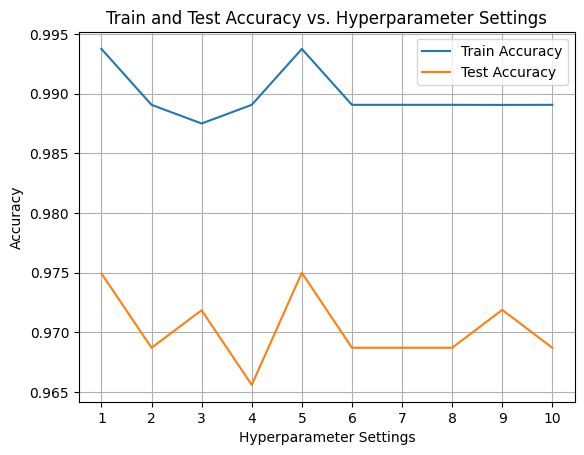

In [ ]:
train_accuracy = rfc_random.cv_results_['mean_train_score']
test_accuracy = rfc_random.cv_results_['mean_test_score']

x_axis = list(range(len(train_accuracy)))

plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

n_estimators = [int(i) for i in np.linspace(start=100, stop=3000, num=25)]
max_depth = [3, 5, 7]
learning_rate = [0.001, 0.01, 0.1, 0.2]
alpha_values = [0, 0.001, 0.01]
lambda_values = [0, 0.001, 0.01]
max_features = ['auto', 'sqrt']
xgbc = XGBClassifier(random_state=23, objective='binary:logistic')

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'alpha': alpha_values,
    'lambda': lambda_values
}

xgbc_random = RandomizedSearchCV(estimator=xgbc, param_distributions=random_grid,
                                 n_jobs=-1, scoring='accuracy', random_state=23,
                                 cv=5, return_train_score=True, error_score='raise')

xgbc_random.fit(X_train, y_train)

train_accuracy = xgbc_random.score(X_train, y_train)
test_accuracy = xgbc_random.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[07:56:28] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Train Accuracy: 1.0
Test Accuracy: 0.975


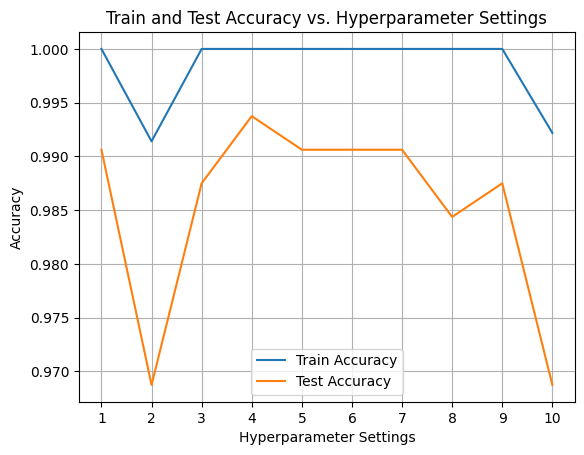

In [ ]:
train_accuracy = xgbc_random.cv_results_['mean_train_score']
test_accuracy = xgbc_random.cv_results_['mean_test_score']

x_axis = list(range(len(train_accuracy)))

plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# AdaBoost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
n_estimators = [int(i) for i in np.linspace(start=120, stop=3000, num=20)]
learning_rate = [0.001, 0.01, 0.1, 0.2]
algorithm = ['SAMME', 'SAMME.R']
random_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'algorithm': algorithm}

adbc = AdaBoostClassifier(random_state=23)
adbc_random = RandomizedSearchCV(estimator=adbc, param_distributions=random_grid, n_jobs=-1, scoring='accuracy',
                                 random_state=23, cv=3, return_train_score=True)
adbc_random.fit(X_train, y_train)

y_train_pred = adbc_random.predict(X_train)
y_test_pred = adbc_random.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Train Accuracy: 0.9875
Test Accuracy: 0.9625


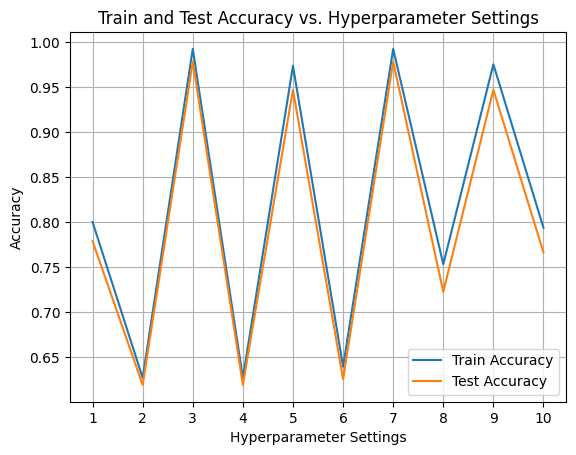

In [ ]:
train_accuracy = adbc_random.cv_results_['mean_train_score']
test_accuracy = adbc_random.cv_results_['mean_test_score']

x_axis = np.arange(len(train_accuracy))
plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, test_accuracy, label='Test Accuracy')
plt.xlabel('Hyperparameter Settings')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Hyperparameter Settings')
plt.xticks(x_axis, np.arange(1, len(x_axis)+1))
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Error Rate')

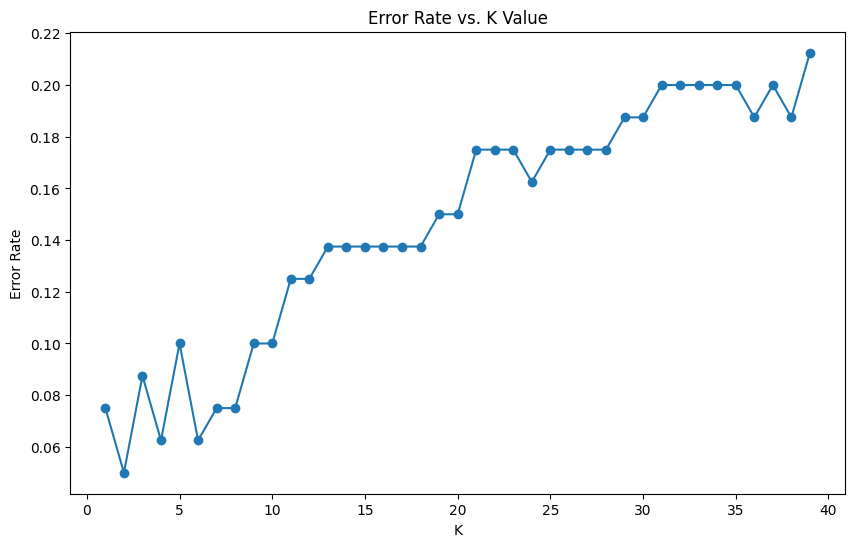

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn_model = knn.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.91875
Test Accuracy: 0.8625


In [ ]:
# SVM Classifier
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
random_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc = SVC(random_state=23,probability=True)
grid = RandomizedSearchCV(svc, random_grid, refit = True, verbose = 3, cv = 3)
svc2 = grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.617 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.617 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.632 total time=   0.0s
[CV 1/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.972 total time=   0.0s
[CV 2/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 3/3] END ....C=100, gamma=0.001, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.935 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.991 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.0s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.991 total time=   0.0s
[CV 3/3] END .......C=1, gamma=0.01, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/3] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.0s
[CV 2/3] END .....C=1000, ga

In [ ]:
y_train_pred = svc2.predict(X_train)
y_test_pred = svc2.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.975


Random Forest Classifier is giving the best results and hence we are choosing it as our final model

In [ ]:
best_params = rfc_random.best_params_
best_rfc = RandomForestClassifier(random_state=23, **best_params)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=23)

In [ ]:
import pickle
model_filename = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/kidney_disease/model/rfc_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_rfc, model_file)

print("Random Forest Classifier model saved successfully.")

Random Forest Classifier model saved successfully.


In [ ]:
model_filename = '/content/drive/My Drive/Colab Notebooks/CreatorsLab/kidney_disease/model/rfc_model.pkl'
with open(model_filename, 'rb') as model_file:
    loaded_rfc_model = pickle.load(model_file)

In [ ]:
random_row_index = np.random.randint(0, len(X_test))

random_row = X_test[random_row_index].reshape(1, -1)

predicted_output = loaded_rfc_model.predict(random_row)
actual_output = y_test.iloc[random_row_index]

print("Predicted Output:", predicted_output)
print("Actual Output:", actual_output)

Predicted Output: [0]
Actual Output: 0
